# Household Electricity Consumption Analysis and segregation, using k-Means Clustering

## Report by: Spandan Gandhi
## Practical Data Science Tutorial (15-688)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
import datetime as dt
import matplotlib.patches as mpatches
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from IPython.display import HTML

<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

1.[Introduction](#Introduction)

2.[Downloading Data File](#Downloading Data File)

3.[Data Cleaning and Analysis](#Data Cleaning and Analysis)

4.[Data Processing](#Data Processing)

5.[K-Means Clustering](#K-Means Clustering)
   
6.[Application](#Application)

7.[References](#References)


<a id='Introduction'></a>
# Introduction

Clustering is the process of classifying a set of objects (here data points) into different groups, such that the objects in the same group are more similar to each other in some particular sense than those in other groups. These different groups are called clusters and mean of each of this cluster is called centroid. The property on basis of which the data is classified depends on the type of data being classified. Clustering belongs to unsupervised learning problems, since the data that are being classified are unlabeled, i.e. it is not known beforehand, which data point belongs to which cluster. There are mainly two major methods of clustering, namely, Partitioning Relocation Clustering and Hierarchical Clustering. The k-means clustering, which is used in this project is a type of Partitioning Relocation Clustering. It is widely used in market segmentation, computer vision, geostatistics, image classification and astronomy. It is also used as a preprocessing step for other algorithms, for example to find a starting configuration.

In [2]:
HTML('<iframe src=https://i.imgur.com/S65Sk9c.jpg width=2000 height=600></iframe>')
#<img src ='https://i.imgur.com/S65Sk9c.jpg', width=2000, height=4000>

This project uses the k-Means clustering to classify 200 households based on their average hourly electricity consumption in the year 2010. The data was taken from NREL data source (https://data.nrel.gov/submissions/69). The households were randomly selected among the ones available in the 2010 RECS data set for the Midwest region of the United States.  The data is in form of a power consumed in Watts(W) by each of the 200 households with a resolution of 10 minutes.

<a id='Downloading Data File'></a>
# Downloading Data File


- **If you do not have a github acount,** please follow the following instructions on the following link to create one in 2 minutes https://github.com/join?source=header-home
- You can **use github desktop app** to handle your github accouunt, if you are not familiar with github coding. https://desktop.github.com/
- Then go to following link https://github.com/SpandanGandhi/PDS_tutorial.git and click on **'clone or download'** option and opt for **'Download ZIP'** option.
- Extract files from the zip folder and use the **'Consumption.csv'** file as data.
- Ensure to **store the csv file in the same folder where you have saved the jupyter notebook.**
- If you are still unable to download the file, read the following instructions on how to download and use **github desktop app.** https://help.github.com/desktop/guides/getting-started-with-github-desktop/

In [3]:
data=pd.read_csv('Consumption.csv', delimiter=None, header='infer')
data.head()

,Time,Household 1,Household 2,Household 3,Household 4,Household 5,Household 6,Household 7,Household 8,Household 9,...,Household 191,Household 192,Household 193,Household 194,Household 195,Household 196,Household 197,Household 198,Household 199,Household 200
0,1/1/2010 0:00,274.16,576.44,1523.90,659.67,1757.7,339.60,1061.90,869.47,230.00,...,332.37,1743.0,923.41,741.07,259.89,409.01,275.91,2071.0,1917.4,664.39
1,1/1/2010 0:10,318.33,425.09,914.60,349.35,1757.7,283.51,391.94,869.47,230.00,...,332.71,1683.7,939.12,445.06,262.80,409.01,275.91,1919.1,2215.2,294.39
2,1/1/2010 0:20,1031.40,425.09,1692.60,313.15,2615.3,334.73,391.94,868.31,275.62,...,1057.70,1687.5,268.28,355.40,265.97,353.04,275.40,2390.7,2196.6,272.92
3,1/1/2010 0:30,293.63,425.09,798.89,325.88,2482.6,1008.20,466.34,869.47,1007.00,...,320.73,1687.5,263.60,372.33,265.84,347.23,269.98,1688.6,2272.2,1019.40
4,1/1/2010 0:40,310.84,461.19,1741.50,339.00,3340.5,1060.00,479.47,1168.30,314.83,...,317.64,2038.7,263.60,445.06,259.89,1115.00,995.15,2058.3,2864.6,294.39


[Data: Impact of uncoordinated plug-in electric vehicle charging on residential power demand - supplementary data](http://ieeexplore.ieee.org/document/5356176/)


<a id='Data Cleaning and Analysis'></a>
# Data Cleaning and Analysis

Here the data is scrubbed of any anomalies and the resultant dataset is graphically visualized

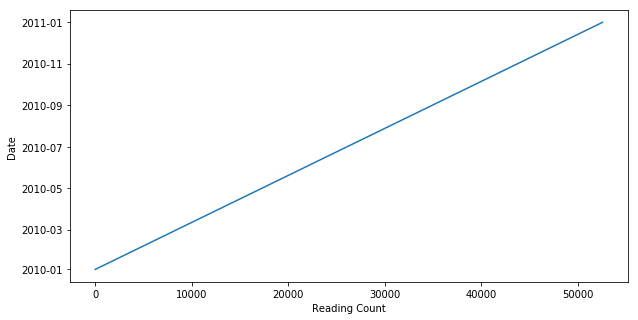

In [4]:
#Converting time to timestamp ( a datetime object)
data['Timestamp']=pd.to_datetime(data['Time'])

# Ensuring there are no temporal gaps
plt.figure(num=1, figsize=(10,5))
data.Timestamp.plot() #Plotting the newly added timestamp column
plt.xlabel('Reading Count')
plt.ylabel('Date')
plt.show()

# As seen in the figure above, time vs index curve is a continuous staight line, 
# assuring that there are no temporal gaps in the data.


In [5]:
# Conforming that all readings are taken at an interval of 10 minutes, 
# the minimum and maximum differences of all the consecutive timestamps are
# taken, as follows:

# Getting the minimum difference between two consecutive timestamps:
print("The minimum difference between any two consecutive timestamps is: " +\
      str(np.min(np.diff(data['Timestamp']))))

# Getting the maximum difference between two consecutive timestamps:
print("The maximum difference between any two consecutive timestamps is: " +\
      str(np.max(np.diff(data['Timestamp']))) )

print ('Since maximum difference = minimum difference, all intervals are fixed at 10 minutes')

The minimum difference between any two consecutive timestamps is: 600000000000 nanoseconds
The maximum difference between any two consecutive timestamps is: 600000000000 nanoseconds
Since maximum difference = minimum difference, all intervals are fixed at 10 minutes


In [6]:
# Ensuring there are no NAN values

a=list(data.isnull().sum(axis=0)==1)
print(a.count(True)) # Number of NAN values
print('\n Thus, no NAN valus are detected.')

0

 Thus, no NAN valus are detected.


[Isnull documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.isnull.html)


In [7]:
# Dropping 'Time' column

data=data.drop(['Time'],axis=1)
data.head()

,Household 1,Household 2,Household 3,Household 4,Household 5,Household 6,Household 7,Household 8,Household 9,Household 10,...,Household 192,Household 193,Household 194,Household 195,Household 196,Household 197,Household 198,Household 199,Household 200,Timestamp
0,274.16,576.44,1523.90,659.67,1757.7,339.60,1061.90,869.47,230.00,430.52,...,1743.0,923.41,741.07,259.89,409.01,275.91,2071.0,1917.4,664.39,2010-01-01 00:00:00
1,318.33,425.09,914.60,349.35,1757.7,283.51,391.94,869.47,230.00,376.24,...,1683.7,939.12,445.06,262.80,409.01,275.91,1919.1,2215.2,294.39,2010-01-01 00:10:00
2,1031.40,425.09,1692.60,313.15,2615.3,334.73,391.94,868.31,275.62,355.19,...,1687.5,268.28,355.40,265.97,353.04,275.40,2390.7,2196.6,272.92,2010-01-01 00:20:00
3,293.63,425.09,798.89,325.88,2482.6,1008.20,466.34,869.47,1007.00,431.07,...,1687.5,263.60,372.33,265.84,347.23,269.98,1688.6,2272.2,1019.40,2010-01-01 00:30:00
4,310.84,461.19,1741.50,339.00,3340.5,1060.00,479.47,1168.30,314.83,351.31,...,2038.7,263.60,445.06,259.89,1115.00,995.15,2058.3,2864.6,294.39,2010-01-01 00:40:00


In [8]:
# Resetting the index of the dataframe
data2=data.set_index('Timestamp', drop=True, append=False, inplace=False, verify_integrity=False)
# Changing the data resolution from 10 minutes to 1 hour. 
# Since the power consumed in a hour, would be the sum of power consumed every six consecutive chunks of 
# ten minumtes, (.sum()) is used to resample the data
data2=data2.resample('H').sum()
data2.head()

,Household 1,Household 2,Household 3,Household 4,Household 5,Household 6,Household 7,Household 8,Household 9,Household 10,...,Household 191,Household 192,Household 193,Household 194,Household 195,Household 196,Household 197,Household 198,Household 199,Household 200
Timestamp,,,,,,,,,,,,,,,,,,,,,
2010-01-01 00:00:00,3271.66,2776.18,8262.19,2287.47,13800.0,3309.27,3908.49,5144.49,2333.07,2323.89,...,2678.79,10157.9,2921.61,3438.72,1574.28,3042.30,2362.50,12192.3,13013.4,2827.00
2010-01-01 01:00:00,2584.46,4093.55,5314.14,1963.21,11346.0,1846.73,3956.54,4606.45,3871.46,3755.02,...,3389.07,7580.0,1589.64,2328.64,2296.99,2927.21,1644.61,12024.8,14443.6,3164.83
2010-01-01 02:00:00,2545.17,4133.15,5317.02,3367.51,9917.0,2571.70,4831.36,3771.50,1741.73,4463.40,...,1939.78,7495.6,3039.64,3052.98,3021.74,2979.93,1631.21,12344.6,13286.0,3173.41
2010-01-01 03:00:00,2619.29,2658.86,5815.02,2003.39,11222.2,1878.19,2559.97,3872.20,1754.54,3045.04,...,1975.70,8951.5,2335.72,3113.23,1584.15,3748.24,4443.06,12678.1,13378.6,2484.48
2010-01-01 04:00:00,1892.75,4997.00,7082.01,3410.85,9579.0,4054.15,3453.00,4708.14,3929.47,2334.96,...,3426.06,8854.6,3051.50,3838.18,2309.14,3032.25,3670.18,13403.5,14872.9,2462.13


[Resample documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.resample.html)

In [9]:
# Adding a Hour column, containing Hour and Minute part of each timestamp
data2['Hour'] = pd.to_datetime(data2.index, format='%H:%M').time
data2['Hour'] = data2.Hour.apply(lambda x: x.strftime('%H:%M'))
# data2['Date'] = data2.index.date
data2.head()

,Household 1,Household 2,Household 3,Household 4,Household 5,Household 6,Household 7,Household 8,Household 9,Household 10,...,Household 192,Household 193,Household 194,Household 195,Household 196,Household 197,Household 198,Household 199,Household 200,Hour
Timestamp,,,,,,,,,,,,,,,,,,,,,
2010-01-01 00:00:00,3271.66,2776.18,8262.19,2287.47,13800.0,3309.27,3908.49,5144.49,2333.07,2323.89,...,10157.9,2921.61,3438.72,1574.28,3042.30,2362.50,12192.3,13013.4,2827.00,00:00
2010-01-01 01:00:00,2584.46,4093.55,5314.14,1963.21,11346.0,1846.73,3956.54,4606.45,3871.46,3755.02,...,7580.0,1589.64,2328.64,2296.99,2927.21,1644.61,12024.8,14443.6,3164.83,01:00
2010-01-01 02:00:00,2545.17,4133.15,5317.02,3367.51,9917.0,2571.70,4831.36,3771.50,1741.73,4463.40,...,7495.6,3039.64,3052.98,3021.74,2979.93,1631.21,12344.6,13286.0,3173.41,02:00
2010-01-01 03:00:00,2619.29,2658.86,5815.02,2003.39,11222.2,1878.19,2559.97,3872.20,1754.54,3045.04,...,8951.5,2335.72,3113.23,1584.15,3748.24,4443.06,12678.1,13378.6,2484.48,03:00
2010-01-01 04:00:00,1892.75,4997.00,7082.01,3410.85,9579.0,4054.15,3453.00,4708.14,3929.47,2334.96,...,8854.6,3051.50,3838.18,2309.14,3032.25,3670.18,13403.5,14872.9,2462.13,04:00


In [10]:
Hourly=data2.groupby(['Hour']).mean()
Hourly.head()

,Household 1,Household 2,Household 3,Household 4,Household 5,Household 6,Household 7,Household 8,Household 9,Household 10,...,Household 191,Household 192,Household 193,Household 194,Household 195,Household 196,Household 197,Household 198,Household 199,Household 200
Hour,,,,,,,,,,,,,,,,,,,,,
00:00,2884.358466,3826.232329,4466.331890,2989.938685,6072.211479,3527.872767,3306.258603,4578.510740,2590.215233,3186.418027,...,3041.731753,5854.496712,2716.329753,3627.190164,2594.102630,3838.568384,2758.757589,7384.871644,8343.120767,3721.437452
01:00,2818.847616,3407.249041,4345.696438,2770.281945,6030.410575,3323.595288,3295.754274,4277.491918,2536.363918,3057.293123,...,2828.849781,5636.112932,2497.036247,3193.313808,2529.117918,3374.590548,2560.209753,7247.549123,8035.105068,3396.757890
02:00,2654.107288,3418.624466,4247.012164,2711.193781,5993.733671,3150.975753,3182.293425,3953.777945,2528.986548,3027.585123,...,2767.310548,5503.938521,2483.051151,2991.281260,2514.891452,3239.340712,2491.512027,7359.229288,7762.277863,2982.074000
03:00,2678.729890,3380.765863,4344.412767,2748.707699,6039.838466,3275.304685,3013.666603,3827.926219,2468.179233,2975.029014,...,2718.156438,5575.139288,2570.982301,2946.480548,2607.827973,3196.006767,2462.531260,7309.320192,7915.247753,3066.141178
04:00,2622.199014,3361.165123,4439.376712,2812.198959,5968.747123,3216.250932,3353.171260,3865.144438,2519.349260,3160.044356,...,2664.020027,5866.168959,2586.711507,3182.009699,2563.429534,3265.929945,2579.525178,7331.721342,7893.560548,3026.054904



[Datetime documentation](https://docs.python.org/3/library/datetime.html)

[Group by documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html)

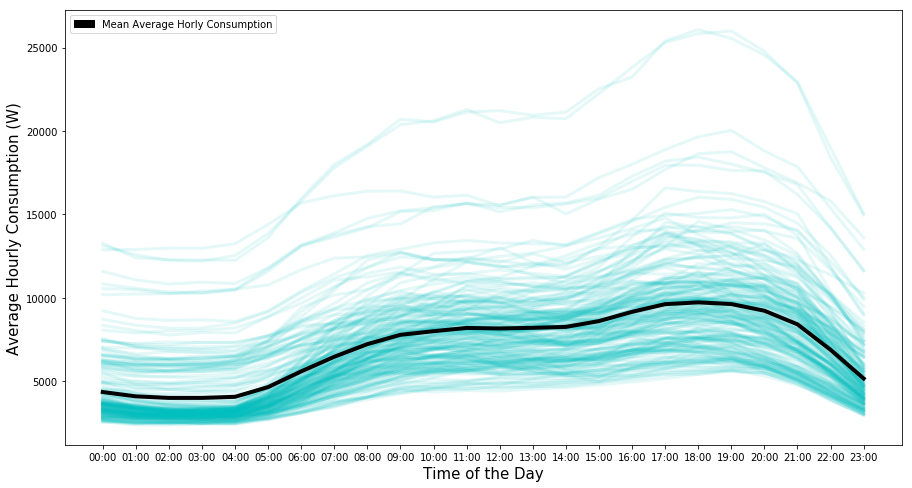

In [11]:
# Plotting Hourly raw Data

plt.figure(num=2, figsize=(15,8))
plt.plot(Hourly, color='c', alpha=0.1, linewidth='3')
plt.plot(Hourly.mean(axis=1),color='k', alpha=1, linewidth='4')
#plt.ylabel('Date')
plt.ylabel('Average Hourly Consumption (W)', fontsize = 15)
plt.xticks(Hourly.index)
plt.xlabel('Time of the Day', fontsize = 15)
leg= mpatches.Patch(color='black', label='Mean Average Horly Consumption')
plt.legend(handles=[leg])
plt.show()

<a id='Data Processing'></a>

# Data Processing

Seasons play an important role in determining the electricity consumption patterns. For example, in winters, houses with electric heaters would consume a significantly higher amount of electricity in the night compared to nights in summers. To account for these seasonal variations the data is split up into four seasons as follows:

- Summer: June, July, August
- Fall: September, October, November
- Winter: December, January, February
- Spring: March, April, May

In [12]:
# Adding a column 'Month' to the original dataframe containing month of the corresponding dataframe
data['Month'] = data['Timestamp'].dt.month

# Making a new dataframe 'Summer' with data cooresponding to summer months
summer = (data.Month >=6) & (data.Month <=8) # Since summer has months from July (6) to August (8)
Summer_df=data[summer].reset_index(drop=True)
Summer_df=Summer_df.drop('Month',axis=1)

# Making a new dataframe 'Fall' with data cooresponding to fall months
fall = (data.Month >=9) & (data.Month <=11) # Since fall has months from September (9) to November (11)
Fall_df=data[fall].reset_index(drop=True)
Fall_df=Fall_df.drop('Month',axis=1)

# Making a new dataframe 'Winter' with data cooresponding to winter months
winter = (data.Month <=2) | (data.Month ==12) # Since winter has months from January (1) to February (2) and month of december(12)
Winter_df=data[winter].reset_index(drop=True)
Winter_df=Winter_df.drop('Month',axis=1)

# Making a new dataframe 'Spring' with data cooresponding to spring months
spring = (data.Month >=3) & (data.Month <=5) # Since spring has months from March (3) to May (5)
Spring_df=data[spring].reset_index(drop=True)
Spring_df=Spring_df.drop('Month',axis=1)

# Checking whether the assignment of data into the four dataframes is correct or not
print(len(Spring_df)) 
print(len(Summer_df))  
print(len(Fall_df))
print(len(Winter_df))

# Assuring data is assigned correctly to the four new **seasonal** dataframe.
len(Spring_df)+len(Summer_df)+len(Fall_df)+len(Winter_df)==len(data) 


13248
13248
13104
12960


True

In [13]:
Summer_df.head()

,Household 1,Household 2,Household 3,Household 4,Household 5,Household 6,Household 7,Household 8,Household 9,Household 10,...,Household 192,Household 193,Household 194,Household 195,Household 196,Household 197,Household 198,Household 199,Household 200,Timestamp
0,230.0,230.0,230.0,230.0,230.0,230.0,230.0,1200.0,230.0,955.0,...,230.0,955.0,230.0,955.0,230.0,955.0,900.0,230.0,955.0,2010-06-01 00:00:00
1,230.0,230.0,230.0,230.0,230.0,230.0,230.0,1200.0,230.0,230.0,...,230.0,230.0,230.0,230.0,230.0,955.0,900.0,230.0,230.0,2010-06-01 00:10:00
2,230.0,230.0,230.0,230.0,955.0,955.0,230.0,1925.0,230.0,230.0,...,230.0,230.0,230.0,230.0,230.0,230.0,900.0,230.0,955.0,2010-06-01 00:20:00
3,230.0,230.0,230.0,230.0,955.0,230.0,955.0,1200.0,230.0,230.0,...,230.0,955.0,230.0,230.0,230.0,230.0,900.0,955.0,230.0,2010-06-01 00:30:00
4,230.0,230.0,230.0,230.0,230.0,230.0,955.0,955.0,230.0,230.0,...,230.0,230.0,230.0,230.0,230.0,955.0,900.0,955.0,230.0,2010-06-01 00:40:00


The **process ** function is created to normalizes the data. Each **Hourly** usage dataframe was normalized by its largest value so that all home profiles would fall within **0 to 1** scale.

In [14]:
def process(df):
    df.name = '%s'%df
    # Changing the resolution of the data to '1 hour'.
    df=df.set_index('Timestamp', drop=True, append=False, inplace=False, verify_integrity=False)
    df=df.resample('H').sum()

    # Adding a new 'Hour' column to get the hour and minutes of all corresponding timestamps
    df['Hour'] = pd.to_datetime(df.index, format='%H:%M').time
    df['Hour'] = df.Hour.apply(lambda x: x.strftime('%H:%M'))
    df['Date'] = df.index.date

    # Grouping the dataframe by hour to get 24 hours of the day as index (0 to 23)
    Hourly=df.groupby(['Hour']).mean()

    # Normalizing the data by dividing all hourly electric consumptions of the given 
    # household, with largest houly consumption.
    Hourly_normalized=Hourly.apply(lambda x: (x / (np.max(x))))
    
    return Hourly_normalized

In [15]:
Summer = process(Summer_df)
Summer.name = 'Summer'
Winter = process(Winter_df)
Winter.name = 'Winter'
Fall = process(Fall_df)
Fall.name = 'Fall'
Spring = process(Spring_df)
Spring.name = 'Spring'

Summer.head()

,Household 1,Household 2,Household 3,Household 4,Household 5,Household 6,Household 7,Household 8,Household 9,Household 10,...,Household 191,Household 192,Household 193,Household 194,Household 195,Household 196,Household 197,Household 198,Household 199,Household 200
Hour,,,,,,,,,,,,,,,,,,,,,
00:00,0.340265,0.303588,0.321528,0.391595,0.352637,0.344170,0.209114,0.214194,0.299551,0.276631,...,0.372946,0.382140,0.399590,0.282448,0.405244,0.211462,0.406247,0.417447,0.305061,0.244267
01:00,0.334256,0.257099,0.322272,0.360664,0.355135,0.343191,0.203721,0.201087,0.274703,0.262978,...,0.327940,0.318837,0.365634,0.231535,0.343067,0.202725,0.377074,0.379723,0.265868,0.238420
02:00,0.301828,0.272363,0.299559,0.294134,0.342299,0.302168,0.216169,0.175923,0.283310,0.262307,...,0.318292,0.334610,0.353365,0.219974,0.358036,0.190786,0.353868,0.377693,0.224832,0.183324
03:00,0.299060,0.236298,0.315180,0.333884,0.339176,0.325547,0.202090,0.161047,0.281148,0.257669,...,0.319970,0.322408,0.346952,0.205001,0.376382,0.168864,0.352213,0.378499,0.257235,0.175956
04:00,0.280773,0.274058,0.318970,0.341579,0.316380,0.311828,0.245964,0.165292,0.278487,0.282848,...,0.330584,0.338699,0.333585,0.212005,0.346684,0.182327,0.366863,0.364291,0.252167,0.180787


In [16]:
# Visualizing the data

def visualize (df):
    plt.figure(num=2, figsize=(15,8))
    plt.plot(df, color='c', alpha=0.1, linewidth='3')
    plt.plot(df.mean(axis=1),color='k', alpha=1, linewidth='4')
    plt.title(df.name, fontsize = 20)
    plt.ylabel('Normalized Average Hourly Consumption', fontsize = 15)
    plt.xticks(df.index)
    plt.xlabel('Time of the Day', fontsize = 15)
    l = mpatches.Patch(color='black', label='Mean Normalized Average Horly Consumption')
    plt.legend(handles=[l])
    plt.show()
    

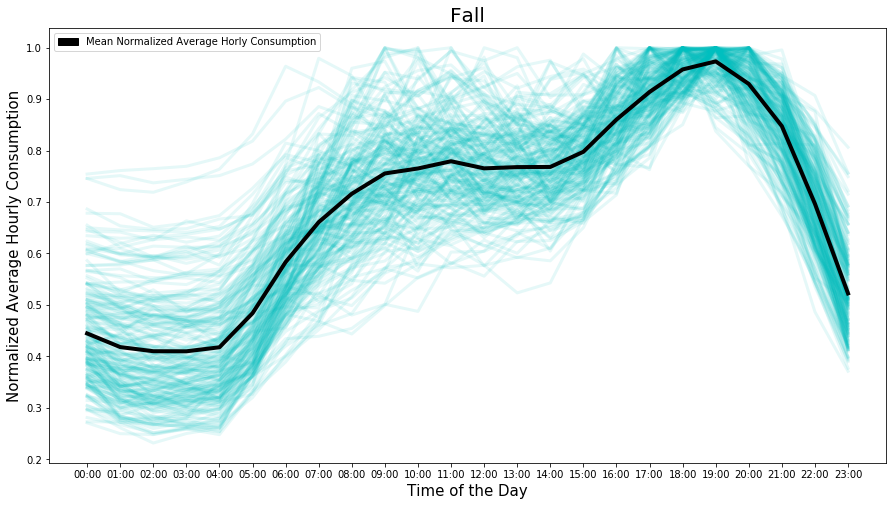

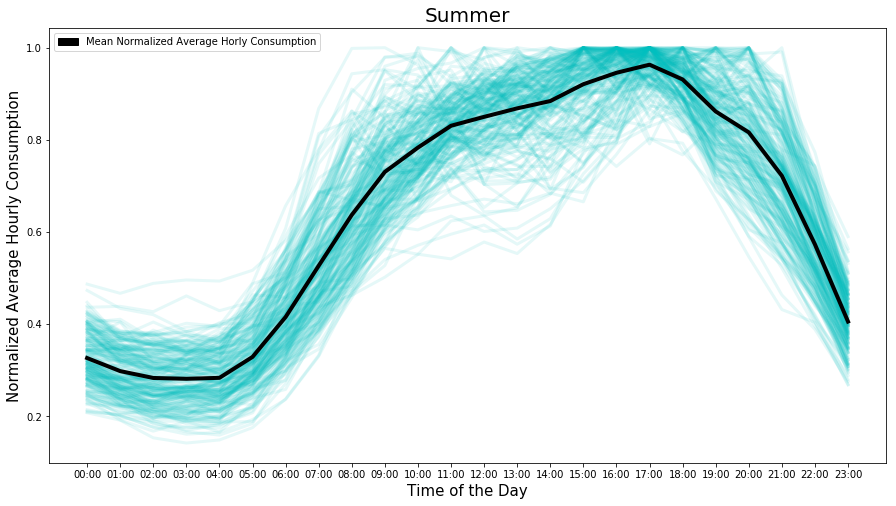

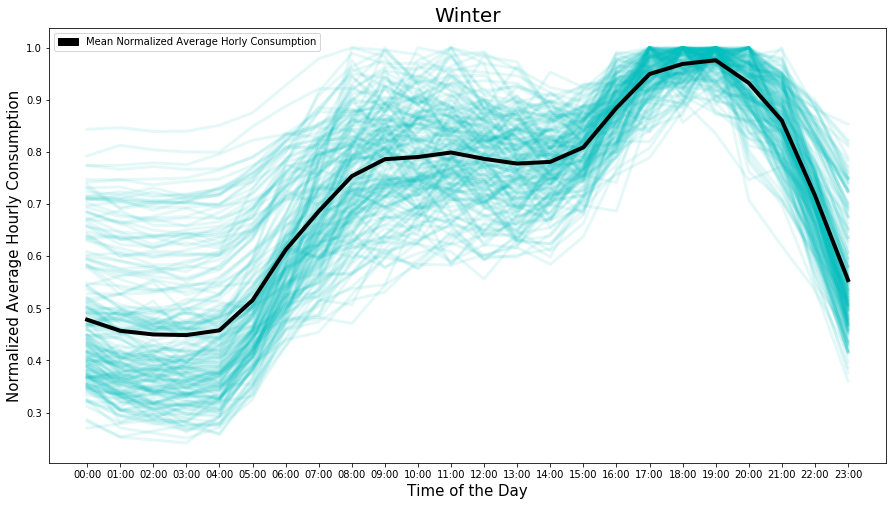

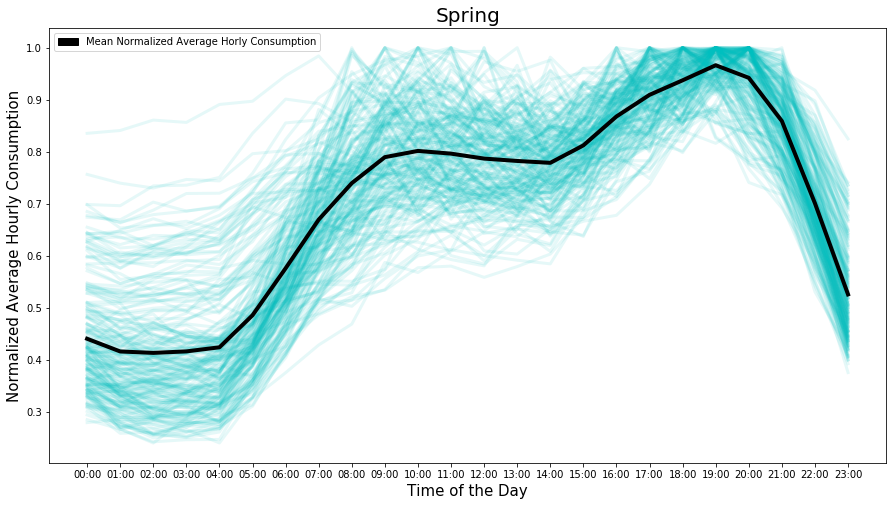

In [17]:
visualize(Fall)
visualize(Summer)
visualize(Winter)
visualize(Spring)

<a id='K-Means Clustering'></a>
# K-Means Clustering

## How does K-Means Clustering Works?

The k-Means Algorithm is an iterative process. It first selects random k centroids, where k is the number of centroids given as the input to the algorithm. It then groups the data points into k clusters, assigning each data points to the nearest centroid to it. It then recalculates the mean of data points assigned to a single cluster and assigns that mean as the new centroid. Like this k new centroids are obtained. After this the process is reiterated until there is convergence of the new previous centroid. The process is explained more clearly with the following example and steps.
Assume that there is a 2-D data available as follows that needs to be clustered:


In [18]:
HTML('<iframe src=http://opencv-python-tutroals.readthedocs.io/en/latest/_images/testdata.jpg width=500 height=400></iframe>')

**Step 1:** Determine the number of cluster to be obtained. This step is one of the trickiest steps for the algorithm. Since the data is unlabeled, one has to input the number of groups (or clusters) desired in the output. Since the variability in the data is unknown, it becomes difficult determine number of clusters required. The optimal number of clusters is somehow subjective and depends on the method used for measuring similarities and the parameters used for partitioning. The three most widely used methods to determine number of clusters are:
-	 Elbow method
-	 Average silhouette method
-	 Gap statistic method
The elbow method is used in this project and is explained in greater detail below. For now, assume that number of clusters required were two.

**Step 2:** First two centroids  **_C1_** and **_C2_** are chosen randomly.

**Step 3:** - Then the distance from each data point to both centroids is calculated. If a point is closer to **_C1_**, then that data is labelled with ‘0’. If it is closer to **_C2_**, then labelled as ‘1’. In our case, we will color all ‘0’ labelled with red, and ‘1’ labelled with blue.

$$ \min\limits_{c_i\in{C}} dist(c_i, x)^2 $$

Here $c_i$ is C1 and C2, while _dist_ represents the euclidean distance between all datapoints (x) and centroids C1 and C2.


In [19]:
HTML('<iframe src=http://opencv-python-tutroals.readthedocs.io/en/latest/_images/initial_labelling.jpg width=500 height=400></iframe>')

**Step 4:** Next mean of all blue points and all red points is calculated separately. The mean of red point is assigned as the new **_C1_** and mean of blue points is assigned as new **_C2_**. 

Let $S_i$ be the set of data points assigned of the $i^{th}$ cluster, then

$$ c_i = \frac{1}{|S_i|}\sum\limits_{x_i\in{S_i}} x_i $$

Here $c_i$ is the newly assigned $i^{th}$ cluster and $x_i$ are all the data points in $S_i$, while $|S_i|$ is the number of data points in set $S_i$


In [20]:
HTML('<iframe src=http://opencv-python-tutroals.readthedocs.io/en/latest/_images/update_centroid.jpg width=500 height=400></iframe>')

**Step 5:** Repeat step 3 with new centroids and label data to ‘0’ and ‘1’. So we get result as below :

**Step 6:** Step - 3 and Step - 4 are iterated until both centroids are converged to fixed points. (Or it may be stopped depending on the criteria we provide, like maximum number of iterations, or a specific accuracy is reached etc.) These points are such that sum of distances between data points and their corresponding centroids are minimum.

In [21]:
HTML('<iframe src=http://opencv-python-tutroals.readthedocs.io/en/latest/_images/final_clusters.jpg width=500 height=400></iframe>')

## Selecting the number of clusters for the NREL Data

The elbow method is used here to determine the number of clusters here.

The Elbow method computes within cluster sum of squares (WSS), which is the sum of square of distances between the centroid and all of data points in that centroid. The total WSS measures the compactness of the clustering and we want it to be as small as possible. Steps include:

- Compute clustering algorithm (e.g., k-means clustering) for different values of k. For instance, by varying k from 1 to 15 clusters.
- For each k, calculate the total within-cluster sum of square (wss).
- Plot the curve of wss according to the number of clusters k.
- The location of a bend (knee) in the plot is generally considered as an indicator of the appropriate number of clusters.


[Methods to determine optimal number of clusters](http://www.sthda.com/english/articles/29-cluster-validation-essentials/96-determining-the-optimal-number-of-clusters-3-must-know-methods/)

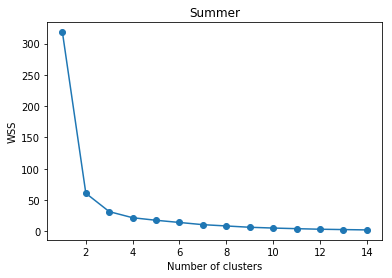

,WSS,num_clusters
0,318.048199,1
1,60.978200,2
2,31.613852,3
3,21.878896,4
4,17.812184,5
5,14.305444,6
6,10.804504,7
7,8.731144,8
8,6.650545,9
9,5.393568,10


In [22]:
S=Summer
error_summer=[]
for k in range(1,15):
    cluster1 = KMeans(n_clusters = k)
    cluster1.fit_predict(S[S.columns[0:]])
    error_summer.append(cluster1.inertia_)

clusters_summer = pd.DataFrame( { "num_clusters":range(1,15), "WSS": error_summer } )

plt.plot( clusters_summer.num_clusters, clusters_summer.WSS, marker = "o" )
plt.xlabel('Number of clusters')
plt.ylabel('WSS')
plt.title('Summer')
plt.show()

clusters_summer

As we can see from the graph and table the WSS is not significantly improved as number of clusters are increased beyond **3**, thus number of clusters desired are chosen to be 3.

In [23]:
def elbow(df):
    error=[]
    for k in range(1,15):
        cluster = KMeans(n_clusters = k)
        cluster.fit_predict(df[df.columns[0:]])
        error.append(cluster.inertia_)

    clusters = pd.DataFrame( { "num_clusters":range(1,15), "cluster_errors": error } )

    plt.plot( clusters.num_clusters, clusters.cluster_errors, marker = "o" )
    plt.xlabel('Number of clusters')
    plt.ylabel('WSS')
    plt.title(df.name)

    plt.show()

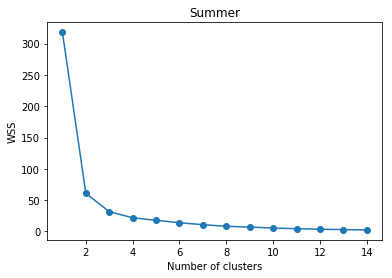

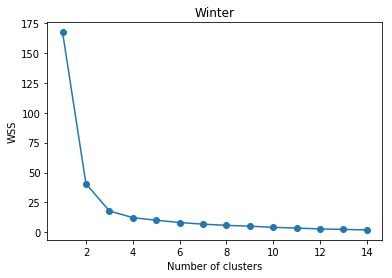

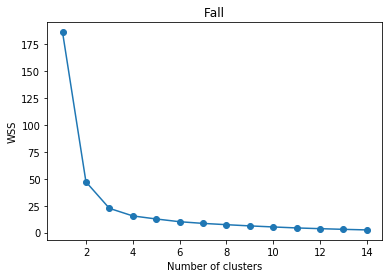

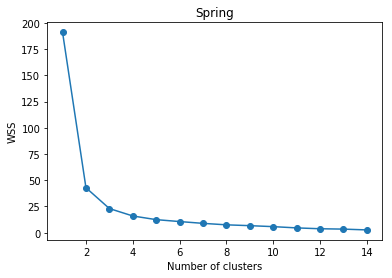

In [24]:
elbow(Summer)
elbow(Winter)
elbow(Fall)
elbow(Spring)

After observing the WSS v/s number of clusters graphs for all the seseaonal dataframes, the number of clusters chosen for each of the dataframe is **3**.

## Applying k-Means Clustering using Sci-kit Learn on the NREL dataset

The **k-Means** class function is used from **sci-kit learn** module to perform clustering on all the four **Seasonal** dataframes. The **n_clusters** attributes takes the input as an integer which is the number of clusters required in the output.

In [25]:
def cluster(x):
    y=x.T # Since we need to assign households to clusters and not hour of the day, the dataframe is transposed
    cluster = KMeans(n_clusters = 3)
    # Adding a new column 'cluster_number' containing cluster assignment (0, 1 or 2) for each household.
    y['cluster_number']=cluster.fit_predict(y[y.columns[0:]])
    y.name = x.name
    return y

In [26]:
s_cl = cluster(Summer)
w_cl = cluster(Winter)
f_cl = cluster(Fall)
sp_cl = cluster(Spring)

## Clustering Results for the NREL dataset

In [27]:
# The following **Assignment** dataframe gives the cluster 
# assignment for each household for each season:

Assignment_df = pd.DataFrame(data=None, index=s_cl.index, columns=None, dtype=None, copy=False)
Assignment_df['Summer'] = s_cl['cluster_number']
Assignment_df['Winter'] = w_cl['cluster_number']
Assignment_df['Fall'] = f_cl['cluster_number']
Assignment_df['Spring'] = sp_cl['cluster_number']
Assignment_df.head()

,Summer,Winter,Fall,Spring
Household 1,1,0,0,0
Household 2,1,0,0,0
Household 3,2,1,0,1
Household 4,2,0,0,0
Household 5,2,1,2,1


In [28]:
# To plot the clustered dataset of each seasonal dataframe the 
# following function **cluster_visualization** is formed. The 
# plots (one for each season) consists of mean normalized power 
# consumption for each household and a curve (darker color) 
# showing the average of mean mormalized power consumption over
# all the households.

def cluster_visulization(x):
    
    x_0 = x[(x.cluster_number==0)].reset_index(drop=True)
    x_0 = x_0.drop(['cluster_number'],axis=1)
    x_1 = x[(x.cluster_number==1)].reset_index(drop=True)
    x_1 = x_1.drop(['cluster_number'],axis=1)
    x_2 = x[(x.cluster_number==2)].reset_index(drop=True)
    x_2 = x_2.drop(['cluster_number'],axis=1)
    
    plt.figure(figsize=(15,8))
    plt.xlabel('Time of the Day', fontsize = 15)
    plt.ylabel('Normalized Average Power', fontsize = 15)
    plt.title(x.name, fontsize = 20)
    plt.plot((x_0).mean(), color='r')
    plt.plot(x_0.T, color = 'r', alpha = 0.03)
    plt.plot((x_1).mean(), color='b')
    plt.plot(x_1.T, color = 'b', alpha = 0.03)
    plt.plot((x_2).mean(), color='g')
    plt.plot(x_2.T, color = 'g', alpha = 0.05)
    
    c = mpatches.Patch(color='red', label='Cluster 1')
    d = mpatches.Patch(color='blue', label='Cluster 2')
    e = mpatches.Patch(color='green', label='Cluster 3')
    
    plt.legend(handles=[c,d,e])
    
    plt.show()     

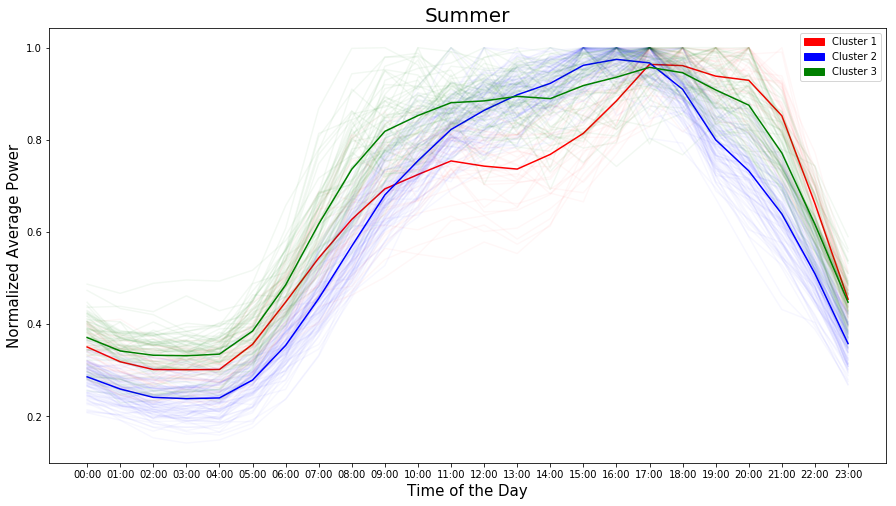

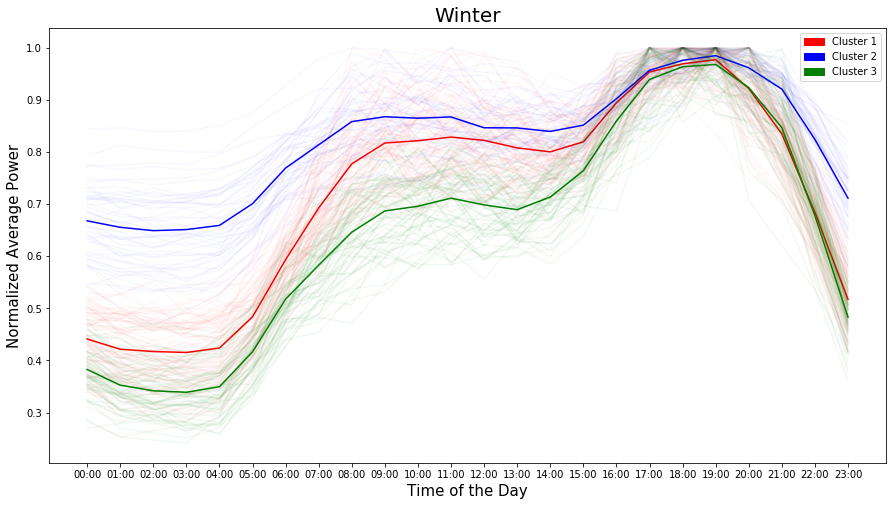

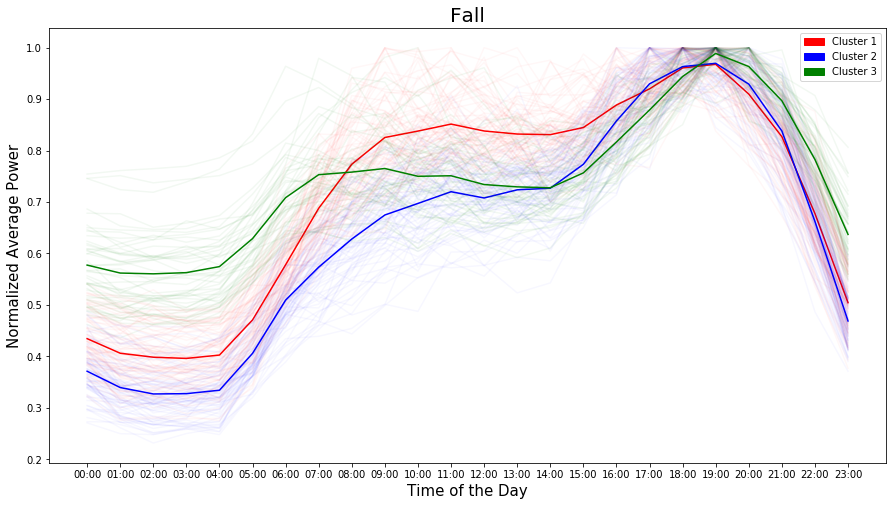

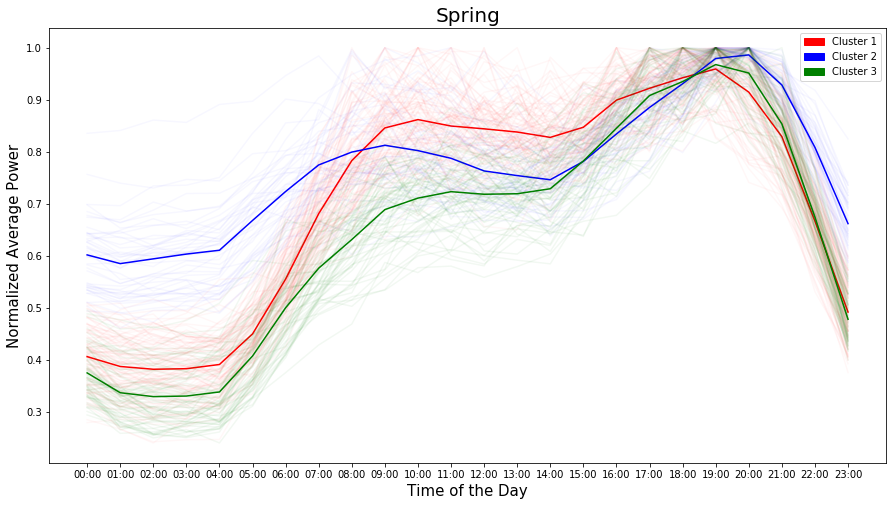

In [29]:
cluster_visulization(s_cl)
cluster_visulization(w_cl)
cluster_visulization(f_cl)
cluster_visulization(sp_cl)

## Results and Interpretation

The general trend in the electricity consumption is observed to be a peak in consumption during evening, possibly due to presence of people in household which would lead to use more appliances. Further there is continuous decrease in consumption of electricity in the night, possibly due to people going to sleep. There is a short rise in consumption in the morning around 6:00, when people in household get ready to leave for work or school. 
-	For the summer season’s data clustering, it is observed that households in cluster 1 on an average have a highest consumption for most of the day, except for 1:00 to 5:00, when cluster 2 has slightly higher consumption. Households assigned to cluster 3 shows a dip in electricity consumption during the afternoon, i.e. 12:00 to 5:00, possibly due to absence of any people in the home during that time.
-	For the winter Cluster 1 and cluster 3 households show a two-peak energy consumption, while cluster 2 households show a pretty much stable use throughout the day. It is possible that there are people using appliances in households during afternoon which leads to comparatively higher consumption in cluster 2 compared to other two. All the households reach peak consumption during evening, however compared to summer time the consumption during afternoon is much higher, possibly due to use of electrical heaters. 
-	 For fall and spring, the trends in electricity consumption are pretty much the same. Also, the cluster allotment in these two seasons are similar. One cluster shows a stable consumption from 12:00 in afternoon to 9:00 in night, while the other two clusters show two different peaks in daily consumption, mainly in the morning around 6:00 and in evening around 7:00.



[More about K-means](https://www.datascience.com/blog/k-means-clustering)

[k-Means documentation](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

## Principal Component Analysis for Data Visualiztion

It would be helpful to visualize this clustered data to understand how well the data is grouped. In our case the data is 24-dimensional, each dimension representing the one hour of the day, making visualization challeging. Thus, PCA is used to reduce that 24-dimensional data into 2D so that we can plot and hopefully understand the data better. It should be noted that after dimensionality reduction, there usually isn’t a particular meaning assigned to each principal component. The new components are just the two main dimensions of variation. 

To compute principal components the **PCA** and **Standard Scalar** functions are used from the **sci-kit learn** module. First the **cluster_number** labelled data frame is separated into **features** and **target**, where features has all the columns except the labels (which is the cluster_number column) and target is the column containing the labels. After this the features dataframe is transformed into a **principal** dataframe containing the 2 principal components, using the **fit_transform** attribute of the pca function. 

Before plotting this 2-D data, one must check the accuracy of the transformation. This is important as while when convert 24 dimensional space to 2 dimensional space, there is loss of some of the variance (information). By using the attribute **explained_variance_ratio**, we get a tuple with two numbers. The first number gives the variance (information) contained in first principal component while the second number gives the variance of the second principal component. The sum of the two components gives the total percentage of information conserved during the transformation. As a rule of thumb the PCA results are considered to be reliable only if this resultant sum is above 0.85, as loss of more than 15% information, leads to inaccurate results.

[Example of PCA](https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60)

In [30]:
# Calculating PCA accuracy

def pca_accuracy (df):
    x=df.iloc[:,:-2].values
    y=df.iloc[:,-1].values
    pca=PCA(n_components=2)
    principal_components=pca.fit_transform(x)
    principal_df=pd.DataFrame(data=principal_components, columns = ['Component 1', 'Component 2'])
    z = pca.explained_variance_ratio_
    return (z[0]+z[1])

In [31]:
print('Explained Variance Ratio for Summer season is', (pca_accuracy(s_cl)))
print('Explained Variance Ratio for Winter season is', (pca_accuracy(w_cl)))
print('Explained Variance Ratio for Fall season is', (pca_accuracy(f_cl)))
print('Explained Variance Ratio for Spring season is',(pca_accuracy(sp_cl)))

Explained Variance Ratio for Summer season is 0.758428402259
Explained Variance Ratio for Winter season is 0.862007517913
Explained Variance Ratio for Fall season is 0.776046563949
Explained Variance Ratio for Spring season is 0.774362294398


In [32]:
# Since explained varience ratio is above 0.85 for only Winter,
# PCA is perforned for only this season.

x_component=w_cl.iloc[:,:-2].values
y_component=w_cl.iloc[:,-1].values
pca=PCA(n_components=2)
principal_components=pca.fit_transform(x_component)
principal_df=pd.DataFrame(data=principal_components, columns = ['Component 1', 'Component 2'])
y_component=pd.Series(y_component.T)
finalDf = pd.concat([principal_df, y_component], axis = 1, ignore_index=False)
finalDf=finalDf.rename(columns={0: 'target'})
finalDf.head()

,Component 1,Component 2,target
0,-0.044202,-0.135616,0
1,-0.198283,0.092334,0
2,0.693681,0.181183,1
3,0.015459,0.167196,0
4,0.632672,-0.203336,1


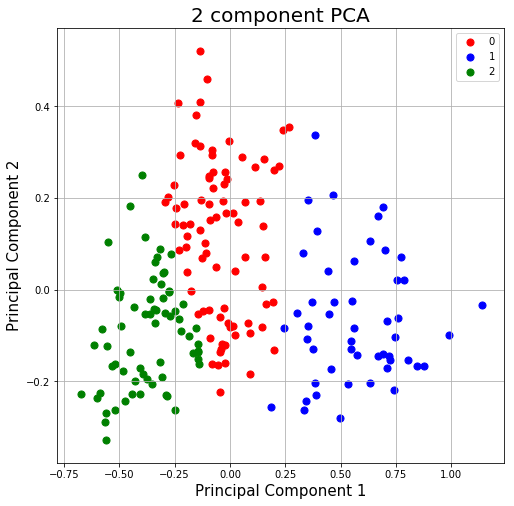

In [33]:
# Plotting final_df

plt.figure(figsize=(8,8))
plt.xlabel('Principal Component 1', fontsize = 15)
plt.ylabel('Principal Component 2', fontsize = 15)
plt.title('2 component PCA', fontsize = 20)
targets = [0, 1, 2]
colors = ['r', 'b', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    plt.scatter(finalDf.loc[indicesToKeep, 'Component 1']
               , finalDf.loc[indicesToKeep, 'Component 2']
               , c = color
               , s = 50)
plt.legend(targets)
plt.grid()
plt.show()

As expected the clusters with lowest euclidean distance to a given centroid are assigned to that centroid.

<a id='Application'></a>
# Application

Apart from making electricity consumption forecasts, this kind of household electricity consumption clustering has a huge significance in Demand Response program initiatives. Demand response refers to shifting electricity utilization from peak hours to low consumption time through time based price variation. By keeping the rates higher during peak electricity consumption and lower during lower consumption times, utilities can force consumers to utilize electricity during time of lower use, shifting the burden during peak consumption. Electric utilities can save millions of dollars and KW of energy through such shift in consumption.

Clustering of households based on their electricity consumption trends would help utilities identify which houses would prove to be responsive to such price variations and which houses won't. It is observed that households with peak electricity consumption in evening and morning are more responsive to demand response initiatives, compared to household that already have a nearly constant consumption throughout the afternoon and evening. Clustering is the easiest way to segregate households in such groups, thus helping utility companies decide the electricity prices to be kept during different time of the day, such that there is significant energy and monetary savings, with minimal increase in prices.

[**Demand Response:** Kwac, Jungsuk, June Flora, and Ram Rajagopal. "Household energy consumption segmentation using hourly data." IEEE Transactions on Smart Grid 5.1 (2014): 420-430.](http://ieeexplore.ieee.org/document/6693793/)

<a id='References'></a>
# References

[Data: Impact of uncoordinated plug-in electric vehicle charging on residential power demand - supplementary data](http://ieeexplore.ieee.org/document/5356176/)

[Isnull documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.isnull.html)

[Resample documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.resample.html)

[Datetime documentation](https://docs.python.org/3/library/datetime.html)

[Group by documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html)

[Methods to determine optimal number of clusters](http://www.sthda.com/english/articles/29-cluster-validation-essentials/96-determining-the-optimal-number-of-clusters-3-must-know-methods/)

[More about K-means](https://www.datascience.com/blog/k-means-clustering)

[k-Means documentation](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

[Example of PCA](https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60)

[**Demand Response:** Kwac, Jungsuk, June Flora, and Ram Rajagopal. "Household energy consumption segmentation using hourly data." IEEE Transactions on Smart Grid 5.1 (2014): 420-430.](http://ieeexplore.ieee.org/document/6693793/)